In [1]:
import pandas as pd
import historic
from pathlib import Path
import cityRemap

In [2]:
df = pd.DataFrame(
        {'dt': pd.date_range('2021-01-01', '2022-01-01', freq='1H', closed='left')})

In [3]:
date = pd.DataFrame()
for month in range(1,13):
    month_data = df[df.dt.dt.month==month]
    date = date.append(month_data.iloc[0:24],ignore_index=True)

In [4]:
historic_interval = pd.DataFrame()
historic_data = pd.read_csv('extracted/high/AMS.csv')
historic_data.dt = pd.DatetimeIndex(historic_data.dt)
historic_data = historic_data[(historic_data.dt.dt.year>2014) & (historic_data.dt.dt.year<2021)]
for month in range(1,13):
    for hour in range(24):  
            points = historic_data.loc[(historic_data.dt.dt.hour==hour) & (historic_data.dt.dt.month==month)]
            lower = points['Temperature'].quantile(0.025)
            higher = points['Temperature'].quantile(0.975)
            historic_interval = historic_interval.append({'Lower':lower,'Higher':higher}, ignore_index=True)
historic_interval = historic_interval.set_index(date.dt)

In [5]:
for year in range(1985,2019):
    for hour in range(24):
            for month in range(1,2):
                points = historic_data.loc[(historic_data.dt.dt.hour==hour) & (historic_data.dt.dt.month==month) & (historic_data.dt.dt.year==year)]
                points.var()

In [6]:
points = historic_data.loc[(historic_data.dt.dt.hour==12) & (historic_data.dt.dt.month==1)]
print(points['Temperature'].quantile(0.95))
print(points['Temperature'].quantile(0.05))

8.985
0.4475


In [13]:
import seaborn as sns

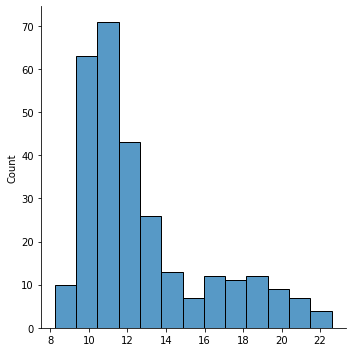

In [14]:
sns.displot((historic_interval.Higher - historic_interval.Lower))

In [15]:
monthly_index = pd.DataFrame()
for month in range(1,13):
    for hour in range(24):
        monthly_index = monthly_index.append({"Date":"M{} H{}".format(month,hour)},ignore_index=True)

In [16]:
historic_interval = historic_interval.set_index(monthly_index.Date)

In [17]:
import plotly.express as px

fig = px.line(historic_interval, y=[historic_interval.Lower,historic_interval.Higher], x=historic_interval.index)

fig.show()

In [18]:
historic_interval = historic_interval.set_index(monthly_index.Date)